# Analise e Predições de Ataques Cardiacos

Um ataque cardíaco ocorre quando os músculos do coração não recebem oxigênio suficiente devido a um bloqueio em uma ou mais artérias coronárias. Esses bloqueios são basicamente o acúmulo de placa que consiste em gorduras, colesterol, etc. O músculo cardíaco que perdeu o suprimento de sangue eventualmente morre e esta condição é muito perigosa e fatal.
Neste estudo vamos investigar a probabilidade de uma pessoa ter ataque cardiaco.

Neste Exércicio iremos abordar os seguintes tópicos:
- Analise Exploratoria
- Fazer modelos SVM, RF e RegLog para classificar o contexto
- Melhorar os modelos com base  no Hiperparametros

Faça o que se pede em cada bloco comentado ⚠⚠⚠ !

### Descrição do dataset <https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset>
    
<p style="font-family: 'Poppins', sans-serif; font-weight:300; font-size: 16px">
1. Age : Age of the patient<br>
2. Sex : Sex of the patient<br>
3. exang: exercise induced angina (1 = yes; 0 = no)<br>
4. ca: number of major vessels (0-3)<br><br>
5. cp : Chest Pain type chest pain type<br><br>
Value 0: typical angina<br>
Value 1: atypical angina<br>
Value 2: non-anginal pain<br>
Value 3: asymptomatic<br><br>
6. trtbps : resting blood pressure (in mm Hg)<br>
7. chol : cholestoral in mg/dl fetched via BMI sensor<br>
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br><br>
9. rest_ecg : resting electrocardiographic results<br><br>
Value 0: normal<br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br><br>
10. thalach : maximum heart rate achieved<br>
11. target : 0= less chance of heart attack 1= more chance of heart attack<br>
12. thall: Thalium Stress Test result ~ (0,3)<br>
13. slp: Slope</p>

In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


# 1. Análise exploratória de dados

In [5]:
# Importando os módulos
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
# Carregando o dataset
df = pd.read_csv("heart.csv - heart.csv.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">A coluna OUTPUT é o nosso target.</p>

### ⚠ Verifique se há dados duplicados, caso positivo remova as duplicatas e reset os index

In [7]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df_clean = df

In [10]:
df_clean.drop_duplicates(inplace=True)

In [11]:
df_clean.reset_index()

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
df_clean.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### ⚠ Exiba uma figura identificando a correlação entre todas as variáveis.

In [13]:
def plot_corr(df, size=14):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

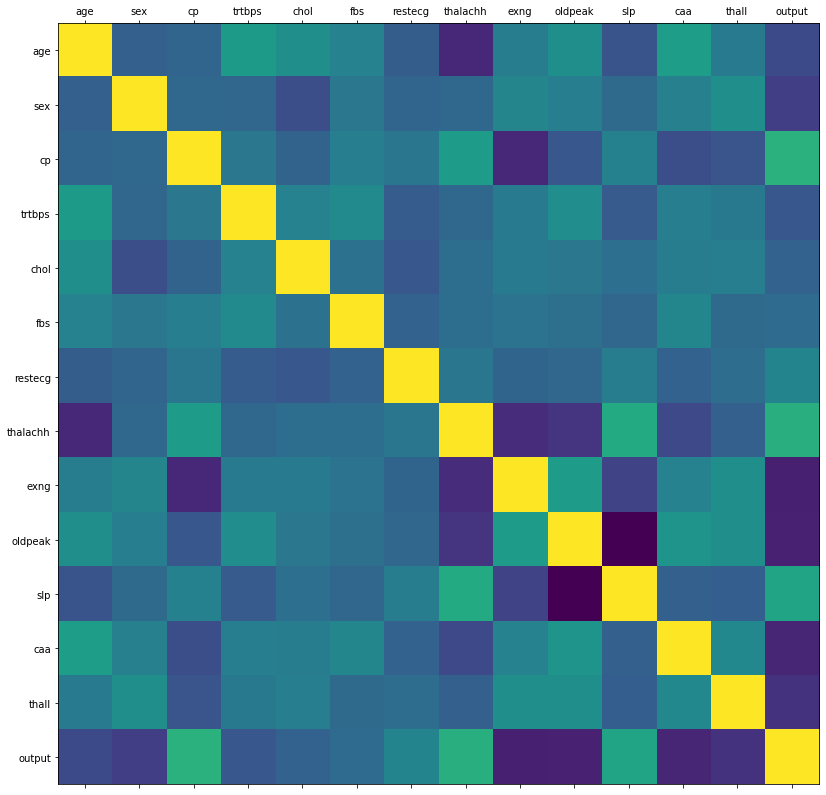

In [14]:
plot_corr(df_clean)

## 2. Processando os dados

### ⚠ Separe as caracteristicas da target e posteriormente faça a divisão de treino e teste com 20% ou 30% dos dados para teste

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_clean.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [17]:
atributos = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

In [18]:
#variavel a ser prevista/alvo
alvo = ["output"]

In [19]:
# Criando objetos
X = df[atributos].values
Y = df[alvo].values

In [20]:
split = 0.20

In [21]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split, random_state = 42)

In [22]:
print("Original True : {0} ({1:0.2f}%)".format(len(df_clean.loc[df['output'] == 1]), 
                                               (len(df_clean.loc[df['output'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df_clean.loc[df['output'] == 0]), 
                                               (len(df_clean.loc[df['output'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 164 (54.30%)
Original False : 138 (45.70%)

Training True : 132 (54.77%)
Training False : 109 (45.23%)

Test True : 32 (52.46%)
Test False : 29 (47.54%)


In [23]:
df_clean

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Construindo e treinando o modelo

### - Logistic Regression (Exemplo)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [25]:
logmodel = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)

In [26]:
logmodel.fit(X_treino, Y_treino.ravel())
predictions1 = logmodel.predict(X_teste)

In [27]:
print("Confusion Matrix: \n", confusion_matrix(Y_teste, predictions1))
print('\n')
print(classification_report(Y_teste, predictions1))

Confusion Matrix: 
 [[24  5]
 [ 6 26]]


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [28]:
logmodel_acc = accuracy_score(Y_teste, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logmodel_acc)

Accuracy of the Logistic Regression Model is:  0.819672131147541


### ⚠ - Execute e exiba os mesmo resultados anteriosres utilizando o algoritmo Random Forest

In [29]:
#Dica
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [30]:
modelo_forest = RandomForestClassifier(random_state = 42)

In [31]:
modelo_forest.fit(X_treino, Y_treino.ravel())
predictions2 = modelo_forest.predict(X_teste)

In [32]:
rf_predict_train = modelo_forest.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [33]:
print("Confusion Matrix: \n", confusion_matrix(Y_teste, predictions2))
print('\n')
print(classification_report(Y_teste, predictions2))

Confusion Matrix: 
 [[26  3]
 [ 5 27]]


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [34]:
forest_acc = accuracy_score(Y_teste, predictions1)
print("Accuracy of the Random Forest Model is: ", forest_acc)

Accuracy of the Random Forest Model is:  0.819672131147541


### ⚠ - Tente melhorar a acurácio do random Forest utilizando o Grid Search

In [37]:
#Dica
from sklearn.model_selection import GridSearchCV

parametros = {
    "max_depth": [3, 4, 5, 6, 7],
    "max_features": ["auto", "sqrt"],
    "n_estimators": [20, 35, 50, 75, 100]
}


grid = GridSearchCV(estimator=modelo_forest, param_grid=parametros,scoring = 'f1', cv = 20)

grid.fit(X_treino, Y_treino.ravel())

print("Melhor Modelo: {}".format(grid.best_estimator_))
print("Melhor Score: {}".format(grid.best_score_))

Melhor Modelo: RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)
Melhor Score: 0.8449358974358974


### ⚠ - Execute e exiba os mesmo resultados anteriosres utilizando o algoritmo Support Vector Machines (SVM)

In [38]:
#Dica
from sklearn.svm import SVC

In [39]:
svc = SVC(random_state=42)
svc.fit(X_treino, Y_treino.ravel())

SVC(random_state=42)

In [40]:
rf_predict_train_svc = svc.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train_svc)))

Exatidão (Accuracy): 0.6515


In [41]:
predictions3 = svc.predict(X_teste)

In [42]:
print("Confusion Matrix: \n", confusion_matrix(Y_teste, predictions3))
print('\n')
print(classification_report(Y_teste, predictions3))

Confusion Matrix: 
 [[16 13]
 [ 5 27]]


              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.84      0.75        32

    accuracy                           0.70        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.70      0.70        61



In [43]:
svc_acc = accuracy_score(Y_teste, predictions3)
print("Accuracy of the Suport Vector Machines is: ", svc_acc)

Accuracy of the Suport Vector Machines is:  0.7049180327868853


### ⚠ - Tente melhorar a acurácio do SVM utilizando o Grid Search

In [48]:
#Dica
from sklearn.model_selection import GridSearchCV

parametros1 = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [49]:
grid1 = GridSearchCV(estimator=svc, param_grid=parametros1)

grid1.fit(X_treino, Y_treino.ravel())

print("Melhor Modelo: {}".format(grid1.best_estimator_))
print("Melhor Score: {}".format(grid1.best_score_))

Melhor Modelo: SVC(C=100, gamma=0.0001, random_state=42)
Melhor Score: 0.7466836734693878


### ⚠ - Liste os seus melhores resultados para cada algoritmo e compare com os resultados apresentados abaixo!

In [50]:
logmodel_best_result=logmodel_acc
forest_best_result = grid.best_score_
svm_best_result = grid1.best_score_

# 4. Resultados

In [52]:
print("Accuracy of Logistic Regression Model is: ",logmodel_best_result*100,"%")
print("Accuracy of Random Forests Model is: ",forest_best_result*100,"%")
print("Accuracy of SVM Model is: ",svm_best_result*100,"%")

Accuracy of Logistic Regression Model is:  81.9672131147541 %
Accuracy of Random Forests Model is:  84.49358974358974 %
Accuracy of SVM Model is:  74.66836734693878 %


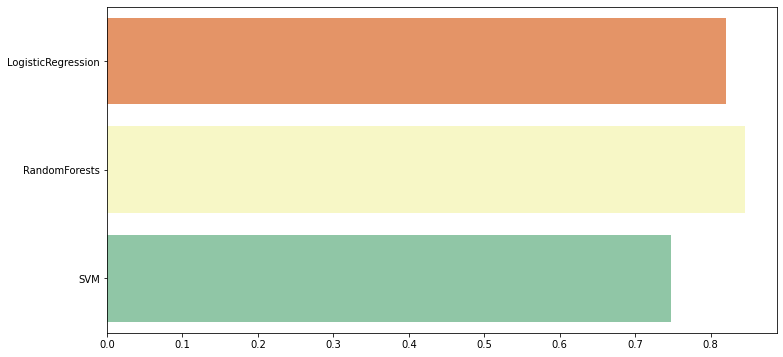

In [53]:
plt.figure(figsize=(12,6))
model_acc = [logmodel_best_result, forest_best_result, svm_best_result]
name_of_model = ['LogisticRegression', 'RandomForests', 'SVM']
sns.barplot(x= model_acc, y=name_of_model, palette='Spectral')